# LetGrowMore
# Iris Flowers Classification Model 
# Ritu Priya Singh

In [36]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [37]:
# Reading the Iris dataset from a CSV file into a Pandas DataFrame
data = pd.read_csv("iris.csv")

# Removing the 'Id' column from the dataset as it appears to be unnecessary
data = data.drop(['Id'], axis=1)

In [38]:
# Displaying a summary of the dataset including statistics like mean, min, max, etc.
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
# Displaying information about the dataset, including column data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
# Counting the number of occurrences of each species in the 'Species' column
species_counts = data['Species'].value_counts()
species_counts

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [41]:
# Checking for any missing (null) values in the dataset
null_counts = data.isnull().sum()
null_counts

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

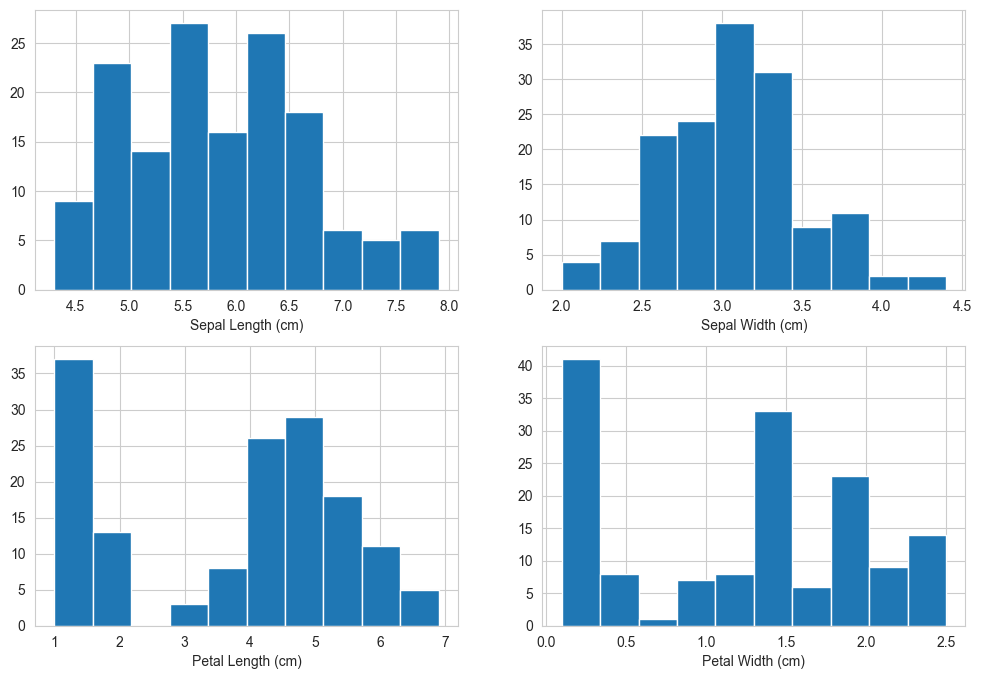

In [42]:
# Creating histograms for four different features in the dataset
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
data['SepalLengthCm'].hist()
plt.xlabel("Sepal Length (cm)")
plt.subplot(2, 2, 2)
data['SepalWidthCm'].hist()
plt.xlabel("Sepal Width (cm)")
plt.subplot(2, 2, 3)
data['PetalLengthCm'].hist()
plt.xlabel("Petal Length (cm)")
plt.subplot(2, 2, 4)
data['PetalWidthCm'].hist()
plt.xlabel("Petal Width (cm)")
plt.show()

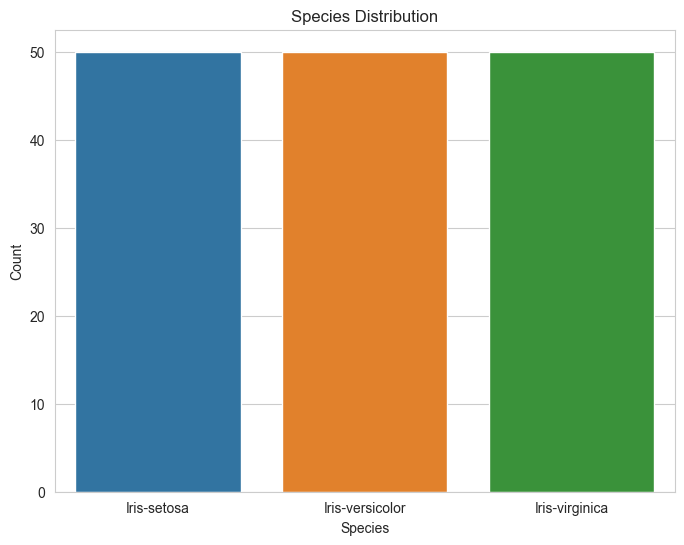

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Species')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

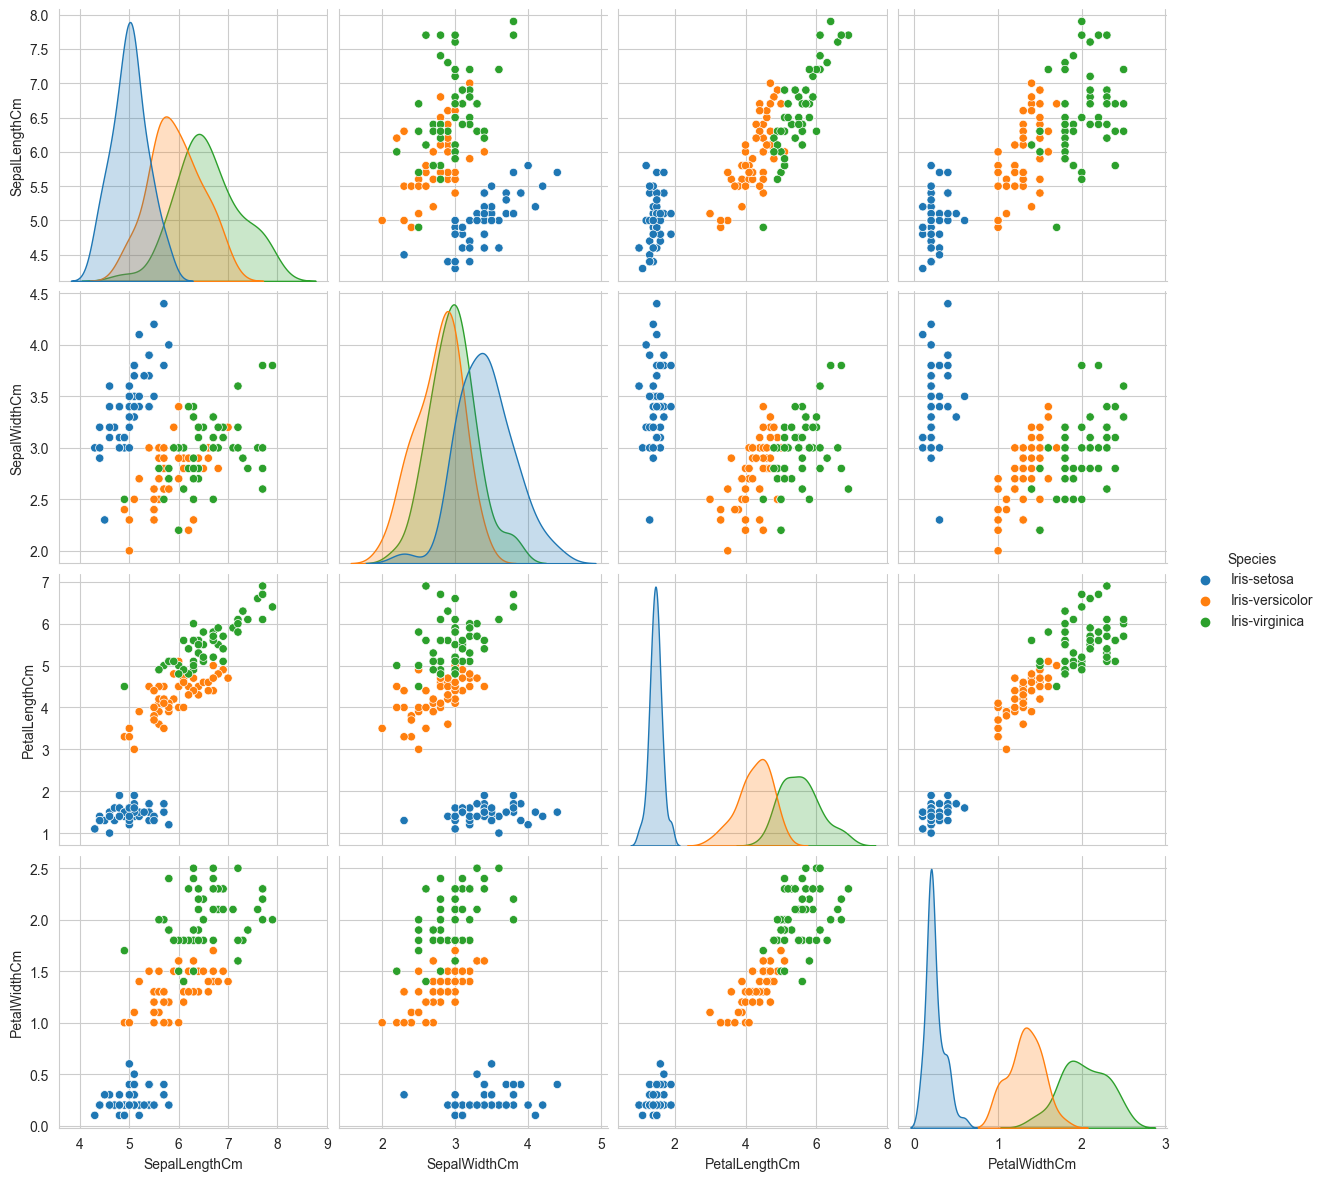

In [46]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="Species", height=3)
plt.show()

In [47]:
# Defining colors and species names for later use in scatter plots
colors = ['yellow', 'plum', 'navy']
species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

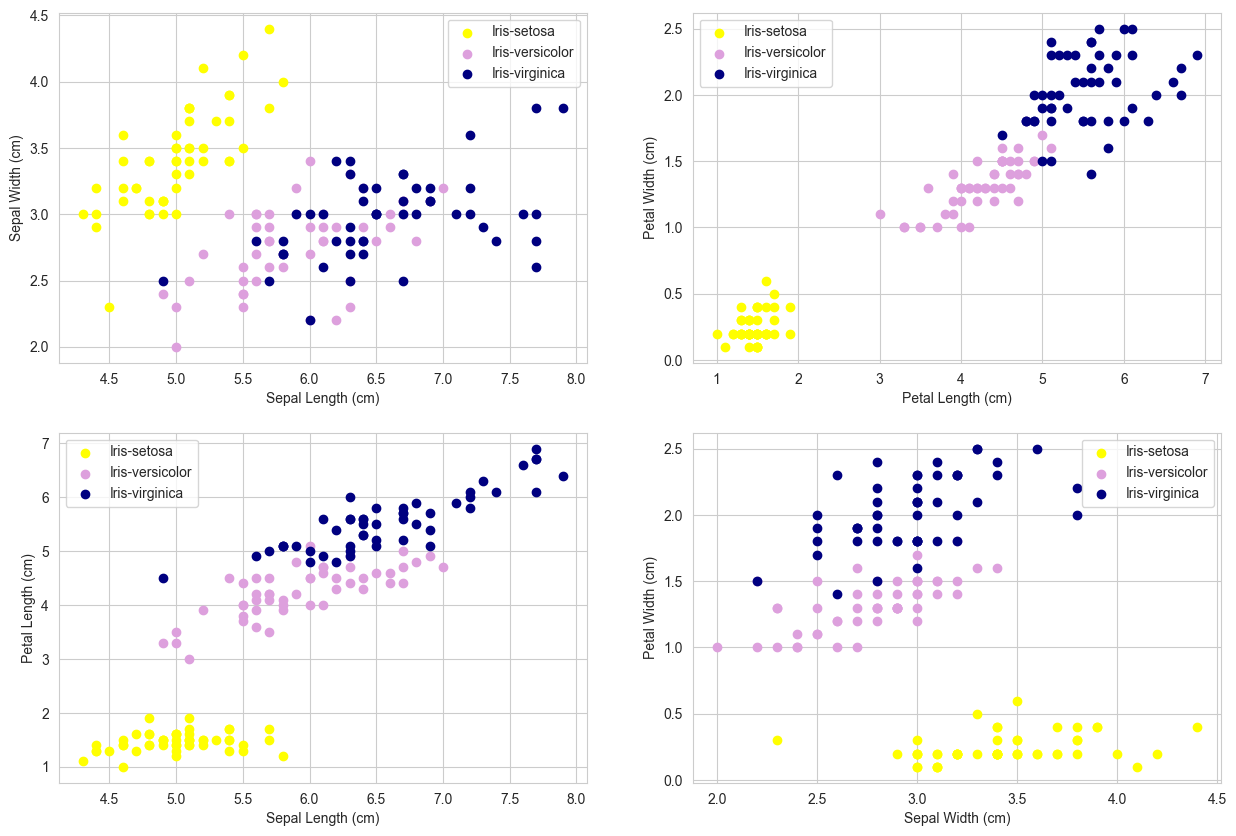

In [48]:
# Creating scatter plots to visualize relationships between different features
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
for i in range(3):
    x = data[data['Species'] == species_names[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species_names[i])

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()

plt.subplot(2, 2, 2)
for i in range(3):
    x = data[data['Species'] == species_names[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species_names[i])

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()

plt.subplot(2, 2, 3)
for i in range(3):
    x = data[data['Species'] == species_names[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species_names[i])

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()

plt.subplot(2, 2, 4)
for i in range(3):
    x = data[data['Species'] == species_names[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species_names[i])

plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()

In [49]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop(columns=["Species"])
Y = data["Species"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)

In [50]:
# Training a Logistic Regression model and evaluating its accuracy
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_accuracy = logistic_model.score(x_test, y_test) * 100

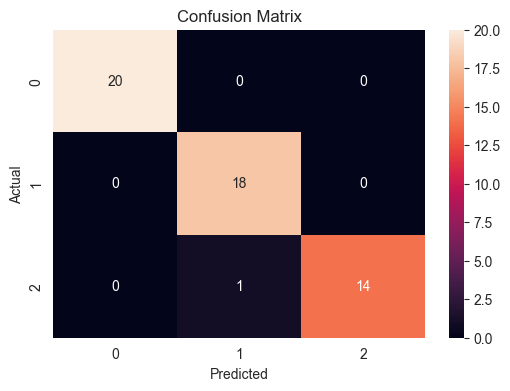

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the logistic_model
y_pred = logistic_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# Training a Decision Tree Classifier model and evaluating its accuracy
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
decision_tree_accuracy = decision_tree_model.score(x_test, y_test) * 100

In [53]:
# Printing the accuracies of the two models
print("Logistic Regression Accuracy:", logistic_accuracy, "%")
print("Decision Tree Accuracy:", decision_tree_accuracy, "%")

Logistic Regression Accuracy: 98.11320754716981 %
Decision Tree Accuracy: 94.33962264150944 %


# Summary
>Imports necessary libraries.
Reads the Iris dataset from a CSV file.
Preprocesses the dataset by removing an unnecessary column, obtaining dataset statistics, checking for missing values, and creating histograms.
Visualizes the data using scatter plots to observe the relationships between different features.
Splits the dataset into training and testing sets.
Trains a Logistic Regression model and a Decision Tree Classifier model on the training data.
Evaluates and prints the accuracy of both models on the testing data.
The code provides insights into data exploration, visualization, and basic machine learning modeling using the Iris dataset.